In [1]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from optimization_dummy import run as run_dummy

results = {1: {}, 2: {}, 3: {}}
pops = {1: {}, 2: {}, 3: {}}
envs = {1: {}, 2: {}, 3: {}}

gens = 30

for enemy in [1, 2, 3]:
    means = np.zeros(gens)
    bests = np.zeros(gens)
    stds = np.zeros(gens)
    
    for i in range(2):
        run_results, pop, env = run_dummy(enemy)
        
        means += run_results['mean']
        bests += run_results['best']
        stds += run_results['std']
        #results[enemy].append(run_results)
        
    pops[enemy] = pop
    envs[enemy] = env

    means /= 10
    bests /= 10
    stds /= 10

    results[enemy]['mean'] = means
    results[enemy]['best'] = bests
    results[enemy]['std'] = stds

pygame 2.5.1 (SDL 2.28.2, Python 3.9.10)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 66.179917 -2.748726 10.422506
Initial mutation rate: 0.2
diversity 26.616710989293505
Mutation rate at generation 1: 0.2
Gen 1 - Best: 66.17991706964764 - Mean: -1.4207870483663105
diversity 26.795664139260722
Mutation rate at generation 2: 0.2
Gen 2 - Best: 66.17991706964764 - Mean: -1.3172795049399948
diversity 26

Gen 27 - Best: 75.01858578874553 - Mean: 41.76270240980964
diversity 27.152441132223586
Mutation rate at generation 28: 0.2
Gen 28 - Best: 75.01858578874553 - Mean: 41.94544418602658
diversity 26.979695554338406
Mutation rate at generation 29: 0.2
Gen 29 - Best: 75.01858578874553 - Mean: 42.397812728391166

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 91.969562 10.295984 30.387278
Initial mutation rate: 0.2
diversity 26.314139168259924
Mutation rate increased to 0.2200000

Gen 19 - Best: 93.40956741322127 - Mean: 91.069024479879
diversity 27.31558247779469
Mutation rate at generation 20: 0.22000000000000003
Gen 20 - Best: 93.40956741322127 - Mean: 91.36565731038698
diversity 27.329337869498996
Mutation rate at generation 21: 0.22000000000000003
Gen 21 - Best: 93.40956741322127 - Mean: 91.58271236120291
diversity 27.267788193487295
Mutation rate at generation 22: 0.22000000000000003
Gen 22 - Best: 93.40956741322127 - Mean: 91.69263019599066
diversity 27.086314673908994
Mutation rate at generation 23: 0.22000000000000003
Gen 23 - Best: 93.40956741322127 - Mean: 91.73733918582104
diversity 26.92693465714818
Mutation rate at generation 24: 0.22000000000000003
Gen 24 - Best: 93.40956741322127 - Mean: 91.76135720898284
diversity 27.061784441098492
Mutation rate at generation 25: 0.22000000000000003
Gen 25 - Best: 93.40956741322127 - Mean: 91.7926332568462
diversity 27.210286277240897
Mutation rate at generation 26: 0.22000000000000003
Gen 26 - Best: 93.4095674

Gen 10 - Best: 65.80968459414686 - Mean: 33.140924890440665
diversity 27.004580725067697
Mutation rate at generation 11: 0.22000000000000003
Gen 11 - Best: 65.80968459414686 - Mean: 34.56275189731282
diversity 27.002263108087217
Mutation rate at generation 12: 0.22000000000000003
Gen 12 - Best: 65.80968459414686 - Mean: 35.38510628252172
diversity 27.11198819402806
Mutation rate at generation 13: 0.22000000000000003
Gen 13 - Best: 66.19185751001956 - Mean: 37.35355116176502
diversity 27.07799886429167
Mutation rate at generation 14: 0.22000000000000003
Gen 14 - Best: 74.78139988030827 - Mean: 38.75290113802593
diversity 27.07083934269084
Mutation rate at generation 15: 0.22000000000000003
Gen 15 - Best: 74.78139988030827 - Mean: 40.82773096672233
diversity 26.915425838828117
Mutation rate at generation 16: 0.22000000000000003
Gen 16 - Best: 74.78139988030827 - Mean: 42.101592170138595
diversity 26.940972930027648
Mutation rate at generation 17: 0.22000000000000003
Gen 17 - Best: 87.383

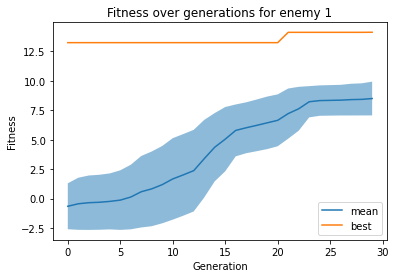

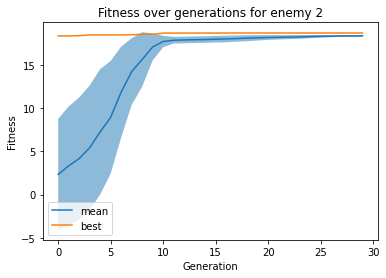

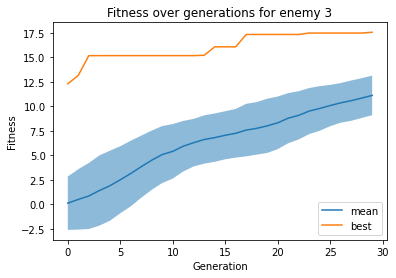

In [2]:
# plot means and best fitness
import matplotlib.pyplot as plt

for i in [1,2,3]:
    plt.figure()
    plt.plot(results[i]['mean'], label='mean')
    plt.plot(results[i]['best'], label='best')
    plt.fill_between(range(gens), results[i]['mean']-results[i]['std'], results[i]['mean']+results[i]['std'], alpha=0.5)
    plt.legend()
    # add title: fitness over generations for enemy 2
    plt.title('Fitness over generations for enemy ' + str(i))
    plt.xlabel('Generation')
    plt.ylabel('Fitness')


{'whiskers': [<matplotlib.lines.Line2D at 0x14663f76bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x146640201f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14663f76160>],
 'medians': [<matplotlib.lines.Line2D at 0x14663648e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x146640421c0>],
 'means': []}

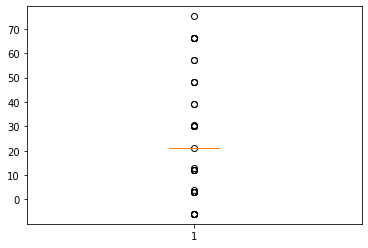

In [10]:
from optimization_dummy import evaluate

fit_pop1 = np.array([evaluate(envs[enemy], pops[1]) for enemy in [1,2,3]])
# fit_pop2 = [evaluate(envs[enemy], pops[2]) for enemy in [1,2,3]]
# fit_pop2 = [evaluate(envs[enemy], pops[3]) for enemy in [1,2,3]]

# print(np.mean(fit_pop1, axis= 1))
# # print(fit_pop1)

# plt.figure()
# plt.bar([1,2,3], np.mean(fit_pop1, axis= 1))
# plt.xticks([1,2,3], ['enemy 1', 'enemy 2', 'enemy 3'])
# plt.ylabel('Fitness')
# plt.title('Fitness for each enemy')

plt.figure()
plt.boxplot(fit_pop1[1])